# **Cluster de objetos espaciales: K-medias**

En este ejemplo vamos a hacer un ejemplo de agrupación con datos espaciales de patrones de puntos. S

En esta práctica voy a utilizar los datos de recogidas de [UBER en la ciudad de Nueva York que están disponibles en Kagle](https://www.kaggle.com/datasets/tekbahadurkshetri/uber-clustering). Para vuestra comodidad os he dejado los datos en el archivo "uber_clean.csv".

El Objetivo es hacer un cluster de posiciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#conda install -c conda-forge folium
import folium



In [2]:
df = pd.read_csv('datos/uber_clean.csv')  
print(df.shape)
print(df.info())
df.head()




(796121, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
 4   Date       796121 non-null  object 
dtypes: float64(2), object(3)
memory usage: 30.4+ MB
None


,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


Para que dure algo menos de tiempo la práctica voy a hacer una subselección de sólo 50.000 registros


In [3]:
df=df.sample(n=5000, frac=None, replace=False, weights=None, random_state=123456)
df.shape

(5000, 5)

# Selección de variables para el Kmeans
Selecciono la longitud y la latitud para hacer el cluster

In [4]:
x = df[["Lat", "Lon"]]
x.head()

,Lat,Lon
537849,40.7690,-73.9688
254940,40.7221,-73.9859
497084,40.7421,-73.9808
535464,40.7201,-73.7317
43377,40.7832,-73.9529


# Agrupación inicial

In [5]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(x)
type(y_kmeans)

numpy.ndarray

Hago la representación

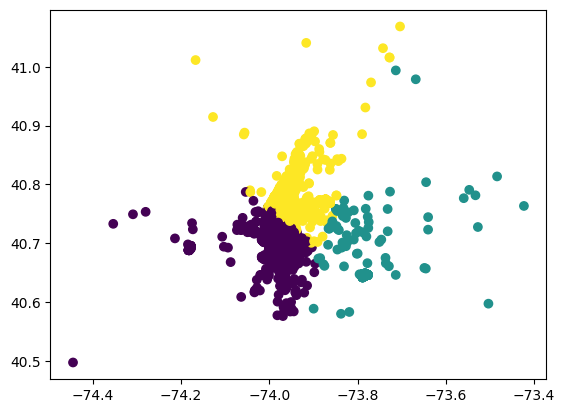

In [6]:
plt.scatter(df['Lon'], df['Lat'], c=y_kmeans)

Puedo probar con varios numeros de grupos visulamente

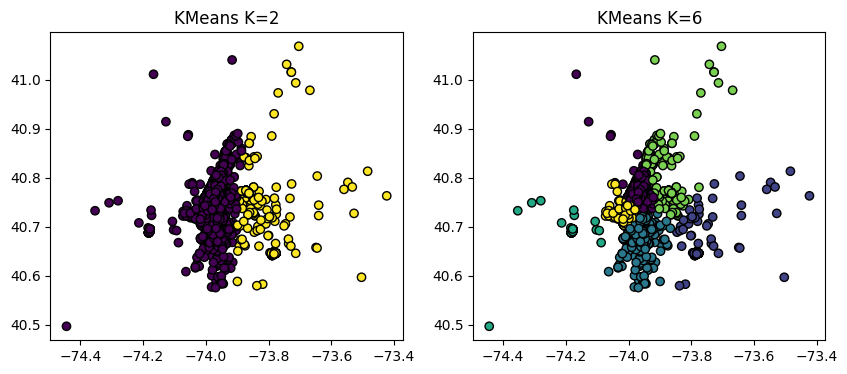

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_kmeans= KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=x)
ax[0].scatter(
        x = df['Lon'],
        y = df['Lat'],
        c = y_kmeans,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_kmeans = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=x)
ax[1].scatter(
        x = df['Lon'],
        y = df['Lat'],
        c = y_kmeans,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

## Selección óptima de clústeres

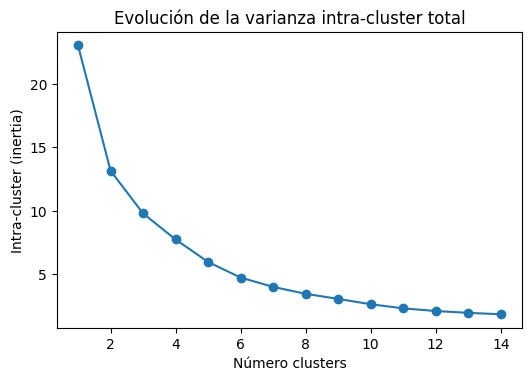

In [8]:
# Método elbow para identificar el número óptimo de clusters
# (identificar aquel punto de la curva (codo) a partir del cual la mejora deja de ser notable)
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    modelo_kmeans.fit(x)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

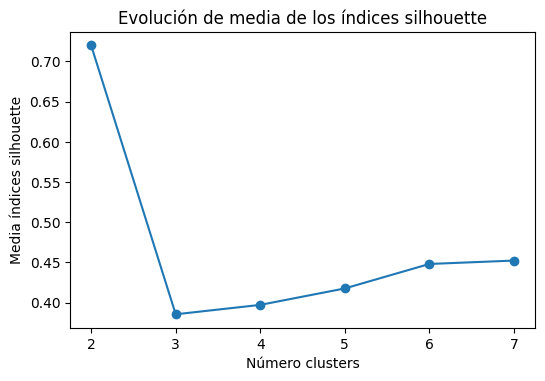

In [9]:
# Método silhouette para identificar el número óptimo de clusters
# (número óptimo de clusters aquel que maximiza la media del *silhouette coeficient* de todas las observaciones)
# ==============================================================================
range_n_clusters = range(2, 8)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

# Agrupación final
**Una vez seleccionado el numero de Clusters óptimo guardo la solución**

In [10]:
model = KMeans(
               n_clusters = 6,
               n_init       = 20,
               random_state = 123
               )
y_kmeans = model.fit_predict(x)
type(y_kmeans)

numpy.ndarray

Guardo el resultado como una columna adicional

In [11]:
df['y'] = y_kmeans
df.head(n=10)

,Date/Time,Lat,Lon,Base,Date,y
537849,2014-07-27 15:59,40.7690,-73.9688,B02617,Sunday,0
254940,2014-07-29 7:40,40.7221,-73.9859,B02598,Tuesday,5
497084,2014-07-24 8:56,40.7421,-73.9808,B02617,Thursday,5
535464,2014-07-27 11:39,40.7201,-73.7317,B02617,Sunday,1
43377,2014-07-02 8:03,40.7832,-73.9529,B02598,Wednesday,0
161093,2014-07-17 18:08,40.6790,-73.9873,B02598,Thursday,2
221966,2014-07-24 21:57,40.7502,-73.9969,B02598,Thursday,5
194401,2014-07-21 23:05,40.6949,-74.1779,B02598,Monday,3
747179,2014-07-25 18:46,40.7743,-73.9488,B02682,Friday,0
494307,2014-07-23 22:55,40.8052,-73.9393,B02617,Wednesday,0


In [12]:
df.y.value_counts()

y
5    2019
0    1882
2     619
4     249
1     185
3      46
Name: count, dtype: int64

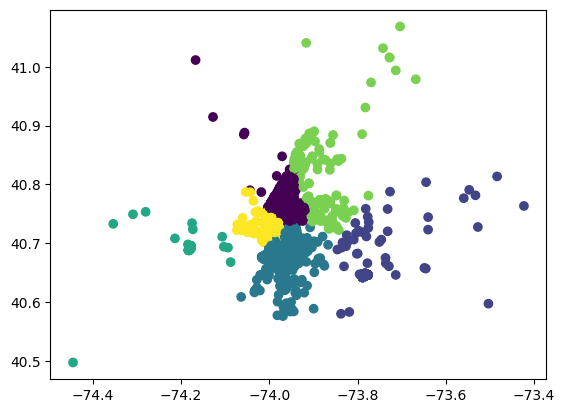

In [13]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

# Representación de los puntos en el plano

Primero seleccione el mapa sobre el que voy a representar los puntos

In [14]:
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "openstreetmap")
map

## Ahora dibujamos cada punto en el mapa anterior.


La otra opción es seleccionando directamente del data frame

In [15]:
# for i in range (0,len(df)):  # No voy a representar todos porque son muchos, me quedo con los 1000 primeros
for i in range (0,1000):
  # primero defino los colores y los textos   
  if df.iloc[i]['y'] == 0:
       color_f="cornflowerblue"
       texto_pop="Pertenezco al cluster 1"
  elif df.iloc[i]['y'] == 1:
       color_f="darkred"
       texto_pop="Pertenezco al cluster 2"
  elif df.iloc[i]['y'] == 2:
       color_f="darkolivegreen"
       texto_pop="Pertenezco al cluster 3"
  elif df.iloc[i]['y'] == 3:
       color_f="chocolate"
       texto_pop="Pertenezco al cluster 4"
  elif df.iloc[i]['y'] == 4:
       color_f="indigo"
       texto_pop="Pertenezco al cluster 5"    
  else:
       color_f="gold"
       texto_pop="Pertenezco al cluster 6"
        
  
        
  folium.CircleMarker([df.iloc[i]['Lat'], df.iloc[i]['Lon']], radius=15, color=color_f, fill=True, fill_opacity=0.6, tooltip=texto_pop, popup="cluster {}".format(df.iloc[i]['y']+1),).add_to(map)
    



In [16]:
map

In [17]:
map.save('mapaUBER.html')